#### Turf Simplification  
Simplify very large turfs 
* Calculate # of points per distance.
* Sort data and visualize
* Simplify polygons with > n # of points with t .   
Currently n =  5000 and t = 50m

In [44]:
import geopandas as gpd
import pandas as pd

path = r"C:\Users\csucuogl\Desktop\Lynn.geojson"
df = gpd.read_file( path )

df.head()

,OBJECTID,GISYN,MapNote,parentglobalid,Consent,ContctName,ContctPhone,ContctEmail,GroupYN,OrgName,...,Srv_Skng_other,Ntw_TpCollb1,Ntw_TpCollb2,Ntw_TpCollb3,Ntw_TpCollb4,Ntw_TpCollb5,n_point,Length,popm,geometry
0,1,N,We operate specific sites within Aquidneck Isl...,{EC795986-4353-4354-8191-1F0E338B6440},AN_Agree,Mary-Kate Kane,None,info@aquidneckcommunitytable.org,YN_Yes,Aquidneck Community Table,...,None,None,None,None,None,None,16928,135436.28,0,"MULTIPOLYGON (((-7938480.129 5078784.162, -793..."
1,2,Y,We work across the entirety of Aquidneck Island,{A0F7F78A-1D0A-475E-82FB-BB3E6BF860A8},AN_Agree,Alex Chuman,401-849-2799x14,achuman@ailt.org,YN_Yes,Aquidneck Land Trust,...,None,town governments,non-profits,State,None,None,16928,135436.28,0,"MULTIPOLYGON (((-7938480.129 5078784.162, -793..."
2,3,N,None,{595C9A0C-FE18-482E-8357-6F68E4A56E13},AN_Agree,"Jo Ann Muramoto, Ph.D.",(508) 540-2667 (home),jmuramoto@apcc.org,YN_Yes,Association to Preserve Cape Cod,...,None,15 towns on Cape Cod,"State agencies (MA DER, MA DMF) and regional a...",Federal-state-local partnerships: MassBays Nat...,"Federal: EPA, NRCS","NGOs (Center for Coastal Studies, Buzzards Bay...",9540,866948.01,0,"MULTIPOLYGON (((-7851169.538 5096427.609, -785..."
3,4,Y,None,{1D742075-4AAE-4574-82E5-032AC1A03E93},AN_Agree,Scott Ruhren,401-949-5454 (x3004),sruhren@asri.org,YN_Yes,Audubon Society of Rhode Island - Conservation,...,None,USDA-NRCS,None,None,None,None,9139,288215.65,0,"MULTIPOLYGON (((-7971043.918 5035332.343, -797..."
4,5,N,None,{062641D9-09E9-4517-87A3-B9B00768F3B2},AN_Agree,Lauren Parmelee,401 949-5454,lparmelee@asri.org,YN_Yes,Audubon Society of Rhode Island - Education,...,None,Providence Parks Urban Wildlife Refuge Partner...,Pawtucket School Department,Schools,Libraries,Community organizations,480369,4457906.22,0,"MULTIPOLYGON (((-7967781.607 5042168.644, -796..."


Create points per meter measure. This is not very useful.

In [47]:
df['pop2'] = (df['n_point'] / df['Length']).round(4)
df = df.sort_values('pop2', ascending=False)
df.head()

,OBJECTID,GISYN,MapNote,parentglobalid,Consent,ContctName,ContctPhone,ContctEmail,GroupYN,OrgName,...,Ntw_TpCollb1,Ntw_TpCollb2,Ntw_TpCollb3,Ntw_TpCollb4,Ntw_TpCollb5,n_point,Length,popm,geometry,pop2
114,115,N,Included is a small greenhouse.,{4FDCDA94-9816-488A-8B01-29B93A129352},AN_Agree,Hannah Moore,508 748 0566,hannahmoore@oldrochester.org,YN_Yes,Sippican School Garden,...,Town of Marion,Old Rochester Regional School District,Tabor Academy,None,None,31,49.97,1,"MULTIPOLYGON (((-7877883.565 5116621.625, -787...",0.6204
84,85,N,"Town of Orleans, Massachusetts",{889BCFD6-2F14-4D5D-8CFF-EFB6D0986506},AN_Agree,Michael P. Marnik,617-285-7008,michaelmarnik@marniklaw.com,YN_Yes,Orleans Pond Coalition,...,None,None,None,None,None,21841,107284.14,0,"MULTIPOLYGON (((-7787097.559 5120574.684, -778...",0.2036
82,83,N,Your boundary does does not include all of Or...,{BE73D5AB-57D6-42D5-8DF1-042815C3917F},AN_Agree,Alexander Bates,508-255-0183,alex@orleansconservationtrust.org,YN_Yes,Orleans Conservation Trust,...,None,None,None,None,None,21841,107284.14,0,"MULTIPOLYGON (((-7787097.559 5120574.684, -778...",0.2036
81,82,Y,Can not accomplish this task. Boundary should...,{D0C9E1EA-8142-4F02-89AA-BDC086FCCC0C},AN_Agree,Judith Bruce,508-255-3134,turtledock@comcast.net,YN_Yes,Orleans Conservation Commission,...,Wetlands expertise,Pleasant Bay Resource Management Guide / Recom...,"Invasives Control, Open Space Collaboration","Expertise on coastal processes, sea level rise",None,21841,107284.14,0,"MULTIPOLYGON (((-7787097.559 5120574.684, -778...",0.2036
80,81,N,Our area of coverage is defined by the boundar...,{27025F32-3EE8-478B-8FB1-2FAC99FF60D1},AN_Agree,Paul Davis,508.868.8771,pwdavis@wpi.edu,YN_Yes,Orleans Can,...,Individual members of the Town of Orleans Sele...,Board of Directors of the Orleans Pond Coalition,"Town of Orleans Water and Sewer Commissioners,",None,None,21841,107284.14,0,"MULTIPOLYGON (((-7787097.559 5120574.684, -778...",0.2036


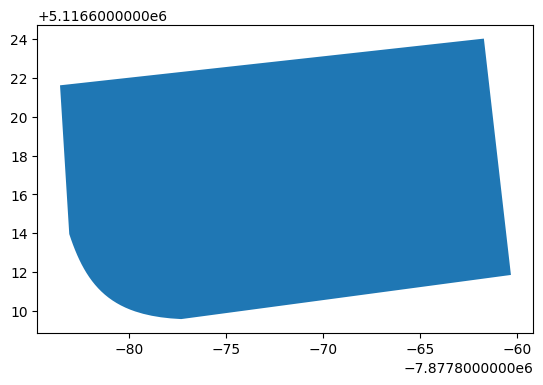

In [51]:
import matplotlib.pyplot as plt

temp = df[ df['OrgName'].str.contains('Sippican') ]
temp.plot()
plt.show()

**Plot points vs Length**  
Visualize n_point vs shape length. Usually longer shapes have more points but some have too much.

In [53]:

import plotly.express as px
fig = px.scatter(
    df,
    x = 'Length',
    y = 'n_point',
    hover_data=["OrgName",'Length','n_point']
)
fig.show()

**Simplify**  
Iterate over geos with more than n_points, simplify by tolerance t.  
mapping counts the number of points before and after the process. I should convert this to a function.  

Replace the new geo (simplified) within the same df. Output a copy df, df1

In [119]:
from shapely.geometry import mapping

n_point = 5000
t = 50
df1 = df.copy() #make a new one
temp = df[ df['n_point'] > n_point ] # Funcking huge ones

names = temp['OrgName'].unique() # Names to iterate

for name in names:
    t1 = temp[ temp['OrgName'] == name ].copy()

    count_init = 0
    for i in mapping( t1['geometry'] )['features']:
        for g in i['geometry']['coordinates']:
            count_init = count_init + len(g[0])

    t1['geometry'] = t1['geometry'].simplify(t) #50 meters resolution

    count_fin = 0
    for i in mapping( t1['geometry'] )['features']:
        for g in i['geometry']['coordinates']:
            count_fin = count_fin + len(g[0])

    print( name, count_init , count_fin )

    df1.loc[ df1['OrgName'] == name , 'geometry' ] = t1['geometry']



Orleans Pond Coalition 21841 538
Orleans Conservation Trust 21841 538
Orleans Conservation Commission 21841 538
Orleans Can 21841 538
The 300 Committee Land Trust  28904 823
Falmouth Water Stewards 28904 824
URI Watershed Watch 13170 1190
Wareham Land Trust 22019 645
Barrington Land Conservation Trust 7786 245
Cape Cod Chamber of Commerce 174283 6169
Aquidneck Land Trust 16928 909
Aquidneck Community Table 16928 909
Eastern Rhode Island Conservation District 59832 2754
Manissean Tribal Council 5371 2
Block Island Conservancy, Inc. 5371 2
Block Island Land Trust 5371 2
Environment Council of Rhode isalnd 138706 6032
Rhode Island Tree Council 138706 6028
The Rhode Island Chapter of Trout Unlimited 138706 6031
Save The Lakes  138706 6024
RI Tree Farm Committee 138706 6025
RI Forest Conservator's Organization, Inc. 138706 6028
Rhode Island Conservation Stewardship Collaborative 138706 6029
Rhode Island Department of Health  138706 6025
Rhode Island Environmental Education Association 13870

**Save Data**

In [120]:

path = r"C:\Users\csucuogl\Desktop\Lynn_All_Reduce_50.geojson"
df1.to_file(
    path,
    driver = 'GeoJSON',
    encoding = 'utf-8'
)